In [4]:
import sys
import datetime
import numpy as np
import pandas as pd
import string
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import gzip
import csv
import matplotlib
import matplotlib.pyplot as plt

DATA_DIR="data"

In [7]:
def add(r, names, df) :
    for m in names:
        r[m].append(df[m].mean())

def tonp (r, names):
    for m in names:
        r[m] = np.array(r[m])
    
def readResults(n, shortname, name):
    m_names = ['metric', 'match', 'distance', 'numf', 'diff']
    prefix = DATA_DIR + "/results/" + shortname + str(n) + "/result_" + name
    suffix = "_" + str(n) + "_10.csv.gz"
    r = {'metric':[], 'match' : [], 'distance' : [], 'numf' : [], 'diff' : [], 'metric2' : [] }
    for i in range(1, 7) :
        fullName = prefix + str(i) + suffix
        df = pd.read_csv(fullName, compression='gzip')#.drop(['Unnamed: 0'],axis=1)
        add(r, m_names, df)
        r['metric2'].append(((1.0 / df['match']) + df['distance']).mean())
    tonp(r, m_names)
    tonp(r, ['metric2'])
    return r

def readResults2(n, shortname, name):
    m_names = ['metric', 'match', 'distance', 'numf', 'diff']
    prefix = DATA_DIR + "/results/" + shortname + str(n) + "/result_" + name
    suffix = "_" + str(n) + "_10.csv.gz"
    r = {'metric':[], 'match' : [], 'distance' : [], 'numf' : [], 'diff' : [], 'metric2' : [] }
    df_full = pd.DataFrame()
    for i in range(1, 7) :
        fullName = prefix + str(i) + suffix
        df = pd.read_csv(fullName, compression='gzip')#.drop(['Unnamed: 0'],axis=1)
        df_full = df_full.append(df)
        add(r, m_names, df)
        r['metric2'].append(((1.0 / df['match']) + df['distance']).mean())
    tonp(r, m_names)
    tonp(r, ['metric2'])
    return df_full

In [8]:
t2 = readResults(2, "t", "train")
t10 = readResults(10, "t", "train")
t50 = readResults(50, "t", "train")
t100 = readResults(100, "t", "train")

In [9]:
v2 = readResults(2, "v", "validate")
v10 = readResults(10, "v", "validate")
v50 = readResults(50, "v", "validate")
v100 = readResults(100, "v", "validate")

In [10]:
v2df = readResults2(2, "v", "validate")
v10df = readResults2(10, "v", "validate")
v50df = readResults2(50, "v", "validate")
v100df = readResults2(100, "v", "validate")

In [11]:
v2df.agg([np.mean, np.std])

,playlist_id,n_clusters,start_num,metric,match,distance,numf,diff
mean,492042.461959,2.0,10.0,32.021612,6.221405,23.265770,6.924944,8.386562
std,284228.286898,0.0,0.0,119.640744,5.471107,20.640215,2.113651,117.883677


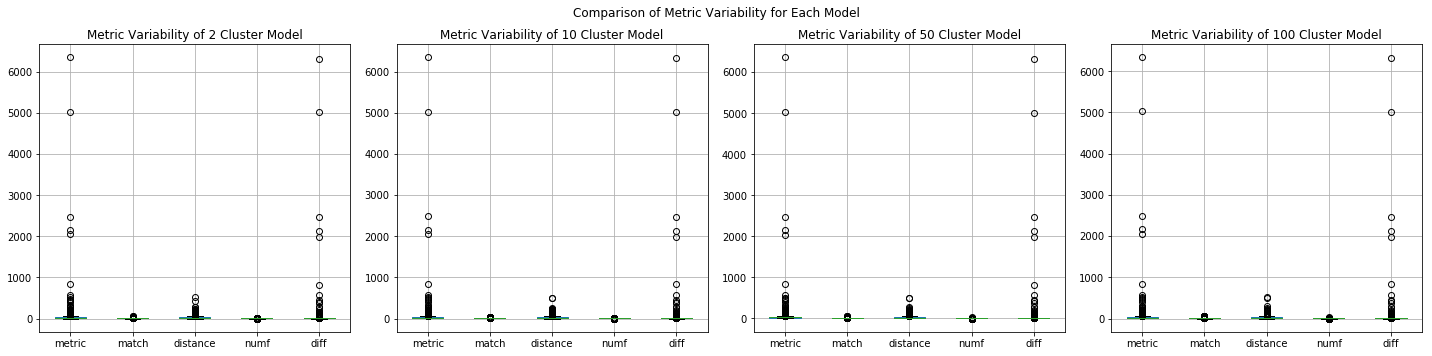

In [12]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
v2df.drop(['playlist_id', 'n_clusters', 'start_num'], axis=1).boxplot(ax=ax[0])
ax[0].set_title('Metric Variability of 2 Cluster Model')
v10df.drop(['playlist_id', 'n_clusters', 'start_num'], axis=1).boxplot(ax=ax[1])
ax[1].set_title('Metric Variability of 10 Cluster Model')
v50df.drop(['playlist_id', 'n_clusters', 'start_num'], axis=1).boxplot(ax=ax[2])
ax[2].set_title('Metric Variability of 50 Cluster Model')
v100df.drop(['playlist_id', 'n_clusters', 'start_num'], axis=1).boxplot(ax=ax[3])
ax[3].set_title('Metric Variability of 100 Cluster Model')
fig.suptitle('Comparison of Metric Variability for Each Model')
fig.tight_layout(rect=[0, 0, 1, .95])
plt.show()

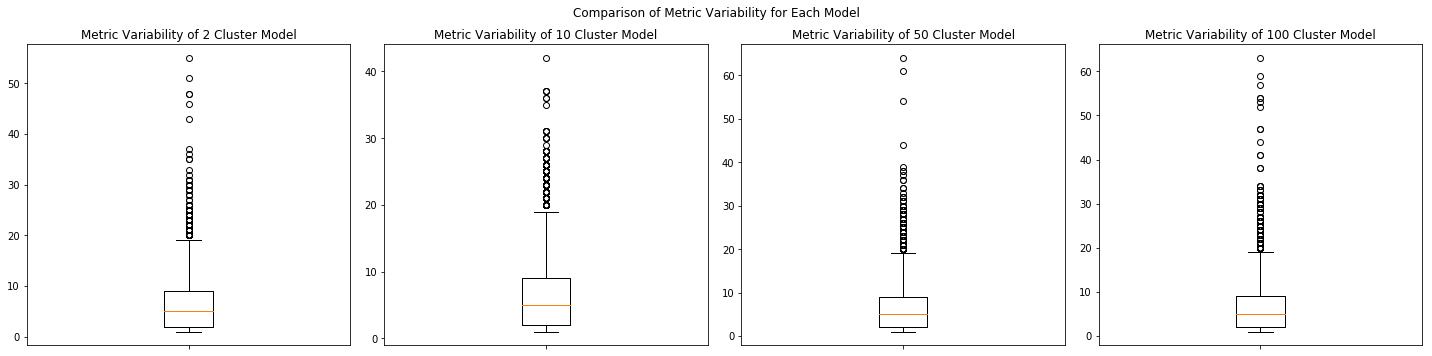

In [13]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].boxplot(v2df.match)
ax[0].set_title('Metric Variability of 2 Cluster Model')
ax[1].boxplot(v10df.match)
ax[1].set_title('Metric Variability of 10 Cluster Model')
ax[2].boxplot(v50df.match)
ax[2].set_title('Metric Variability of 50 Cluster Model')
ax[3].boxplot(v100df.match)
ax[3].set_title('Metric Variability of 100 Cluster Model')
for axis in ax:
    axis.set_xticklabels('')
fig.suptitle('Comparison of Metric Variability for Each Model')
fig.tight_layout(rect=[0, 0, 1, .95])
plt.show()

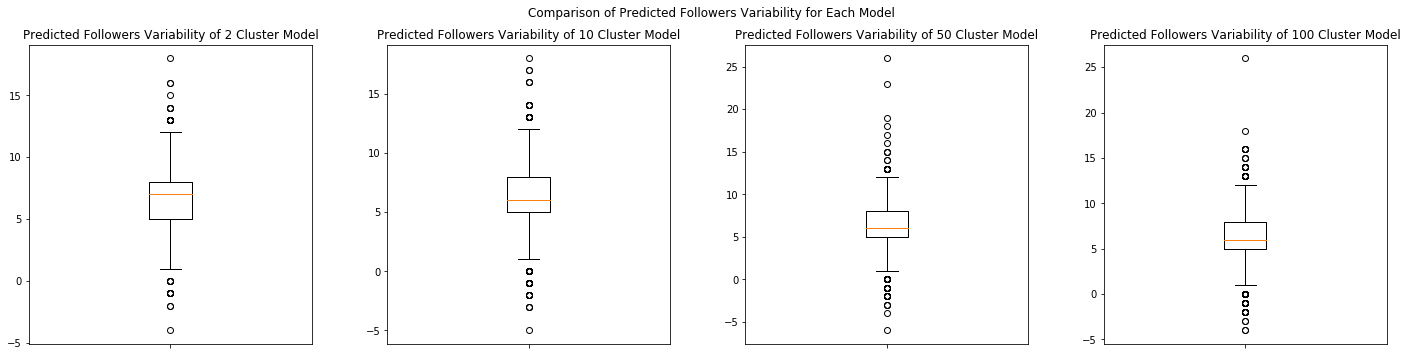

In [14]:
fig, ax = plt.subplots(1,4,figsize=(20,5))
ax[0].boxplot(v2df.numf)
ax[0].set_title('Predicted Followers Variability of 2 Cluster Model')
ax[1].boxplot(v10df.numf)
ax[1].set_title('Predicted Followers Variability of 10 Cluster Model')
ax[2].boxplot(v50df.numf)
ax[2].set_title('Predicted Followers Variability of 50 Cluster Model')
ax[3].boxplot(v100df.numf)
ax[3].set_title('Predicted Followers Variability of 100 Cluster Model')
for axis in ax:
    axis.set_xticklabels('')
fig.suptitle('Comparison of Predicted Followers Variability for Each Model')
fig.tight_layout(rect=[0, 0, 1, .95])
plt.show()

In [15]:
test2 = readResults(2, 'test', 'test')
test10 = readResults(10, 'test', 'test')

In [16]:
def make_mean_metrics(models, sn):
    results_dict = {}
    #models = [t2, t10, t50, t100]
    names = [2, 10, 50, 100]
    for model, name in zip(models, names):
        model_params = {}
        for key in model:
            model_params[key] = np.mean(model[key])
            model_params[key+'std'] = np.std(model[key])
        results_dict[sn+str(name)] = model_params
    return results_dict

In [17]:
models_train = [t2, t10, t50, t100]
train_dict = make_mean_metrics(models_train, 't')
results_train = pd.DataFrame.from_dict(train_dict).T
results_train

,diff,diffstd,distance,distancestd,match,matchstd,metric,metric2,metric2std,metricstd,numf,numfstd
t2,17.366214,19.586043,23.742464,1.204582,6.019813,0.117456,41.496689,24.130509,1.202147,18.936747,6.903080,0.654374
t10,17.447881,19.232502,24.761268,0.929312,6.129652,0.176668,42.599327,25.151356,0.934653,18.970186,7.006165,0.197402
t50,17.313173,19.268623,25.829698,0.902331,6.151795,0.124508,43.530253,26.217108,0.903429,19.148228,6.777501,0.138788
t100,17.419482,19.445556,25.663053,0.693858,6.215457,0.099706,43.468382,26.048898,0.689577,19.784372,6.772136,0.073181


In [18]:
models_validate = [v2, v10, v50, v100]
validate_dict = make_mean_metrics(models_validate, 'v')
results_validate = pd.DataFrame.from_dict(validate_dict).T
results_validate

,diff,diffstd,distance,distancestd,match,matchstd,metric,metric2,metric2std,metricstd,numf,numfstd
v2,8.383877,3.004734,23.266120,0.923800,6.221482,0.087430,32.019275,23.635325,0.926099,3.192091,6.924442,0.808971
v10,7.866056,2.634214,24.467220,0.964562,6.322889,0.081322,32.699332,24.833359,0.962880,3.407503,6.181138,0.223869
v50,7.961983,2.822155,24.610007,0.909844,6.493108,0.070977,32.932138,24.970164,0.908917,3.431358,6.253282,0.109693
v100,7.884393,2.696971,24.743925,0.742098,6.541668,0.095974,32.985807,25.101392,0.744146,3.234505,6.126036,0.171505


In [19]:
models_test = [test2, test10]
test_dict = make_mean_metrics(models_test, 'test')
results_test = pd.DataFrame.from_dict(test_dict).T
results_test

,diff,diffstd,distance,distancestd,match,matchstd,metric,metric2,metric2std,metricstd,numf,numfstd
test2,13.347084,7.996984,25.105574,1.956354,6.189874,0.139431,38.832057,25.48498,1.956773,8.834247,7.429872,0.323859
test10,12.797532,8.089814,24.755806,0.846285,6.294219,0.155728,37.930501,25.13291,0.847011,8.529533,6.795775,0.237814


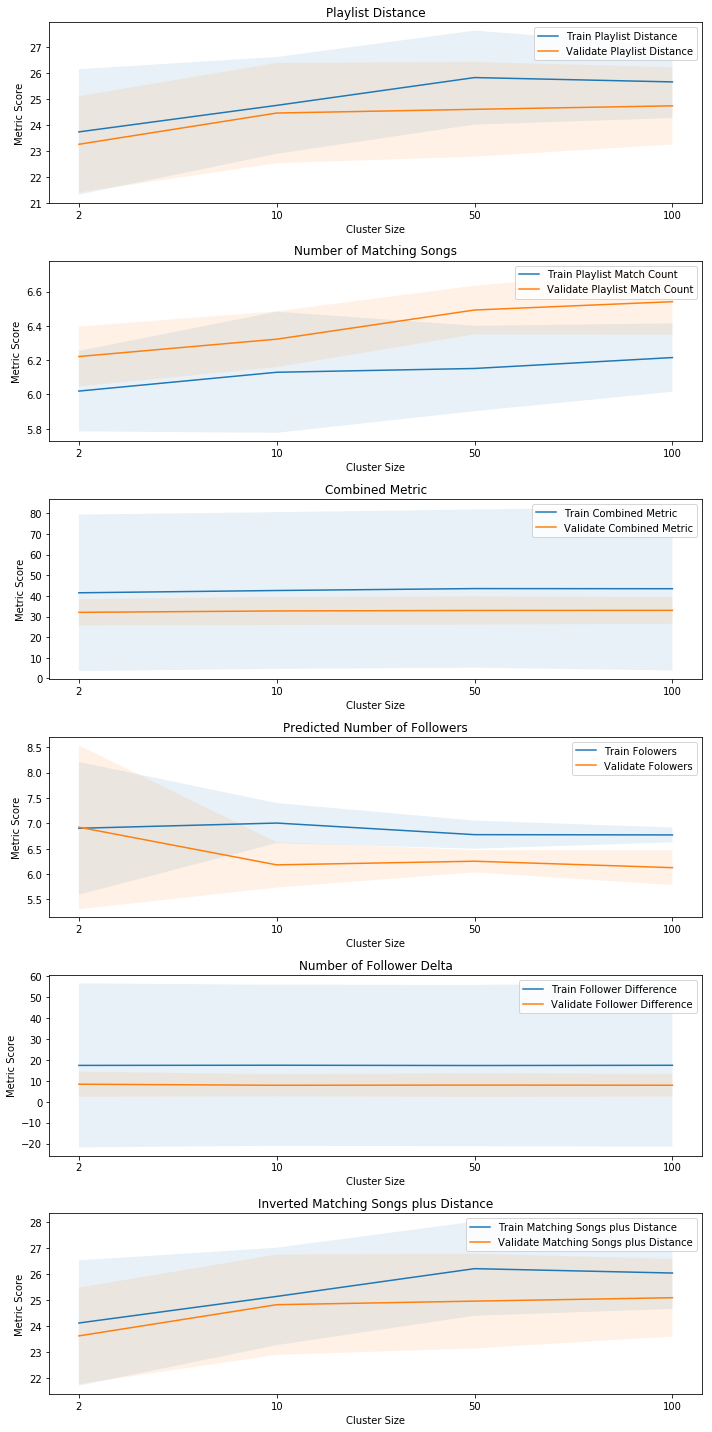

In [26]:
plot_alpha = .1
fig, ax = plt.subplots(6,1, figsize=(10,20))
labels_train = ['Train Playlist Distance', 'Train Playlist Match Count', 'Train Combined Metric', 'Train Folowers', 
                'Train Follower Difference', 'Train Matching Songs plus Distance']
labels_validate = ['Validate Playlist Distance', 'Validate Playlist Match Count', 'Validate Combined Metric', 
                   'Validate Folowers', 'Validate Follower Difference', 'Validate Matching Songs plus Distance']
plot_order = ['distance', 'match', 'metric', 'numf', 'diff', 'metric2']
titles = ['Playlist Distance', 'Number of Matching Songs', 'Combined Metric', 'Predicted Number of Followers', 
          'Number of Follower Delta', 'Inverted Matching Songs plus Distance']
names = [2, 10, 50, 100]
# results_train.plot(y='diff', ax=ax[0])
# results_train.plot(y='distance', ax=ax[1])
# results_train.plot(y='match', ax=ax[2])
# results_train.plot(y='metric', ax=ax[3])
for axis, po, labelt, labelv, title in \
zip(ax, plot_order, labels_train, labels_validate, titles):
    results_train.plot(y=po, ax=axis, label=labelt)
    axis.fill_between(np.arange(4), results_train[po] + 2*results_train[po+'std'],
                      results_train[po] - 2*results_train[po+'std'], alpha=plot_alpha)
    results_validate.plot(y=po, ax=axis, label=labelv)
    axis.fill_between(np.arange(4), results_validate[po] + 2*results_validate[po+'std'],
                      results_validate[po] - 2*results_validate[po+'std'], alpha=plot_alpha)
    axis.set_xlabel('Cluster Size')
    axis.set_ylabel('Metric Score')
    axis.set_xticks(np.arange(4))
    axis.set_xticklabels(names)
    axis.set_title(title)
fig.tight_layout()
plt.show()

In [21]:
results_validate_test = results_validate.loc[['v2', 'v10'], :]
results_train_test = results_train.loc[['t2', 't10'], :]

In [22]:
po, results_train[po+'std']

('diff', t2      19.586043
 t10     19.232502
 t50     19.268623
 t100    19.445556
 Name: diffstd, dtype: float64)

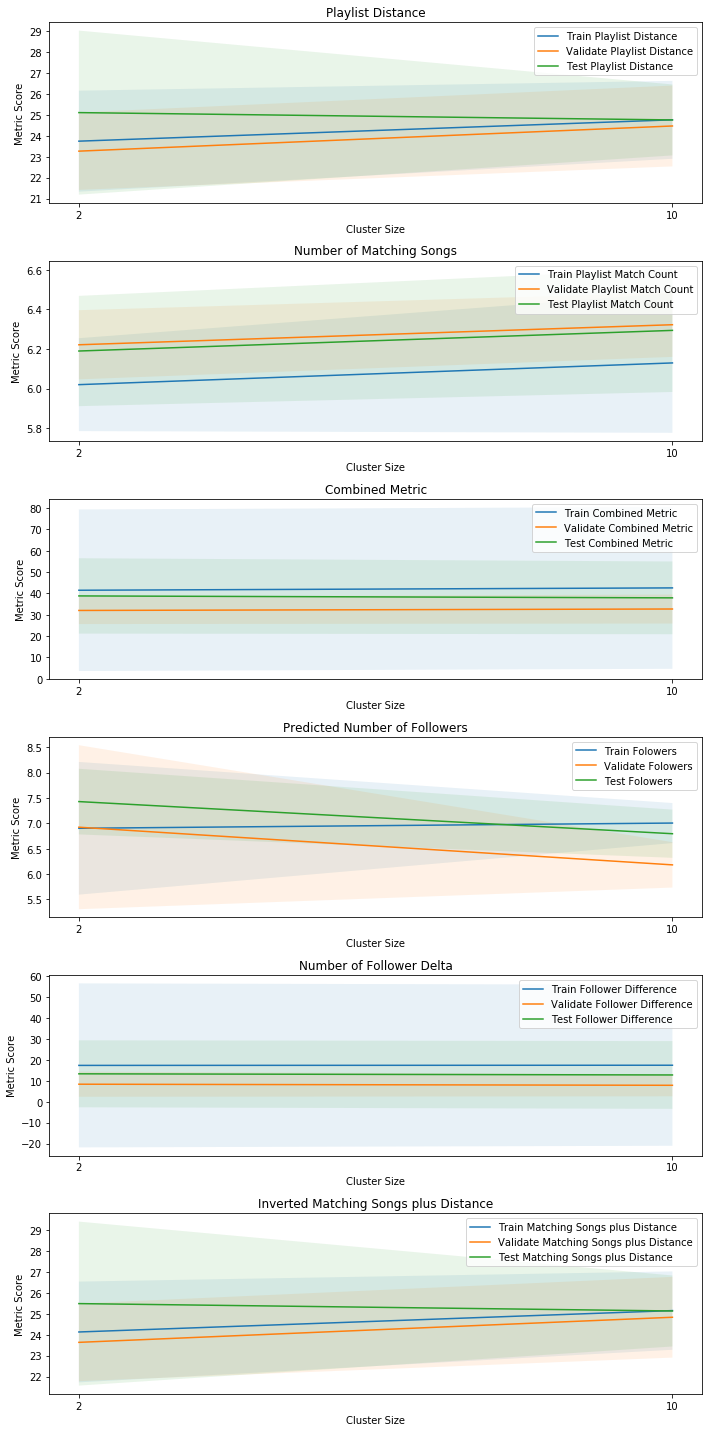

In [30]:
fig, ax = plt.subplots(6,1, figsize=(10,20))
labels_train = ['Train Playlist Distance', 'Train Playlist Match Count', 'Train Combined Metric', 'Train Folowers', 
                'Train Follower Difference', 'Train Matching Songs plus Distance']
labels_validate = ['Validate Playlist Distance', 'Validate Playlist Match Count', 'Validate Combined Metric', 
                   'Validate Folowers', 'Validate Follower Difference', 'Validate Matching Songs plus Distance']
labels_test = ['Test Playlist Distance', 'Test Playlist Match Count', 'Test Combined Metric', 'Test Folowers', 
               'Test Follower Difference', 'Test Matching Songs plus Distance']
plot_order = ['distance', 'match', 'metric', 'numf', 'diff', 'metric2']
titles = ['Playlist Distance', 'Number of Matching Songs', 'Combined Metric', 'Predicted Number of Followers', 
          'Number of Follower Delta', 'Inverted Matching Songs plus Distance']
names = [2, 10]
# results_train.plot(y='diff', ax=ax[0])
# results_train.plot(y='distance', ax=ax[1])
# results_train.plot(y='match', ax=ax[2])
# results_train.plot(y='metric', ax=ax[3])
for axis, po, labelt, labelv, title, labeltest in \
zip(ax, plot_order, labels_train, labels_validate, titles, labels_test):
    results_train_test.plot(y=po, ax=axis, label=labelt)
    axis.fill_between(np.arange(2), results_train_test[po] + 2*results_train_test[po+'std'],
                      results_train_test[po] - 2*results_train_test[po+'std'], alpha=plot_alpha)
    results_validate_test.plot(y=po, ax=axis, label=labelv)
    axis.fill_between(np.arange(2), results_validate_test[po] + 2*results_validate_test[po+'std'],
                      results_validate_test[po] - 2*results_validate_test[po+'std'], alpha=plot_alpha)
    results_test.plot(y=po, ax=axis, label=labeltest)
    axis.fill_between(np.arange(2), results_test[po] + 2*results_test[po+'std'],
                      results_test[po] - 2*results_test[po+'std'], alpha=plot_alpha)
    axis.set_xlabel('Cluster Size')
    axis.set_ylabel('Metric Score')
    axis.set_xticks(np.arange(2))
    axis.set_xticklabels(names)
    axis.set_title(title)
fig.tight_layout()
plt.show()

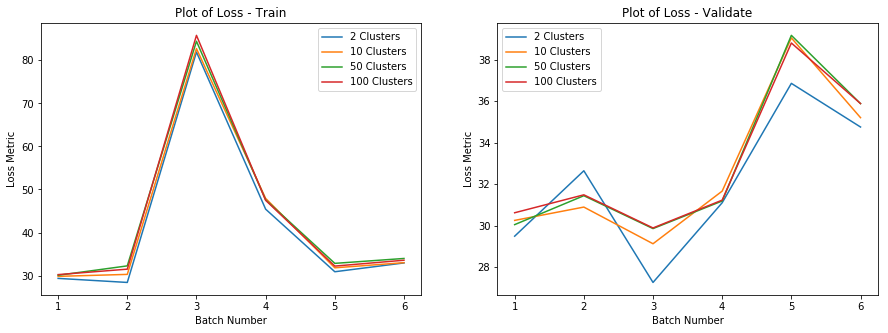

In [24]:
x = range(1, 7)
fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].set_title('Plot of Loss - Train')
axes[0].plot(x, t2['metric'], label='2 Clusters')
axes[0].plot(x, t10['metric'], label='10 Clusters')
axes[0].plot(x, t50['metric'], label='50 Clusters')
axes[0].plot(x, t100['metric'], label='100 Clusters')
axes[0].set_xlabel('Batch Number')
axes[0].set_ylabel('Loss Metric')
axes[0].legend()
axes[1].set_title('Plot of Loss - Validate')
axes[1].plot(x, v2['metric'], label='2 Clusters')
axes[1].plot(x, v10['metric'], label='10 Clusters')
axes[1].plot(x, v50['metric'], label='50 Clusters')
axes[1].plot(x, v100['metric'], label='100 Clusters')
axes[1].set_xlabel('Batch Number')
axes[1].set_ylabel('Loss Metric')
axes[1].legend()
plt.show()

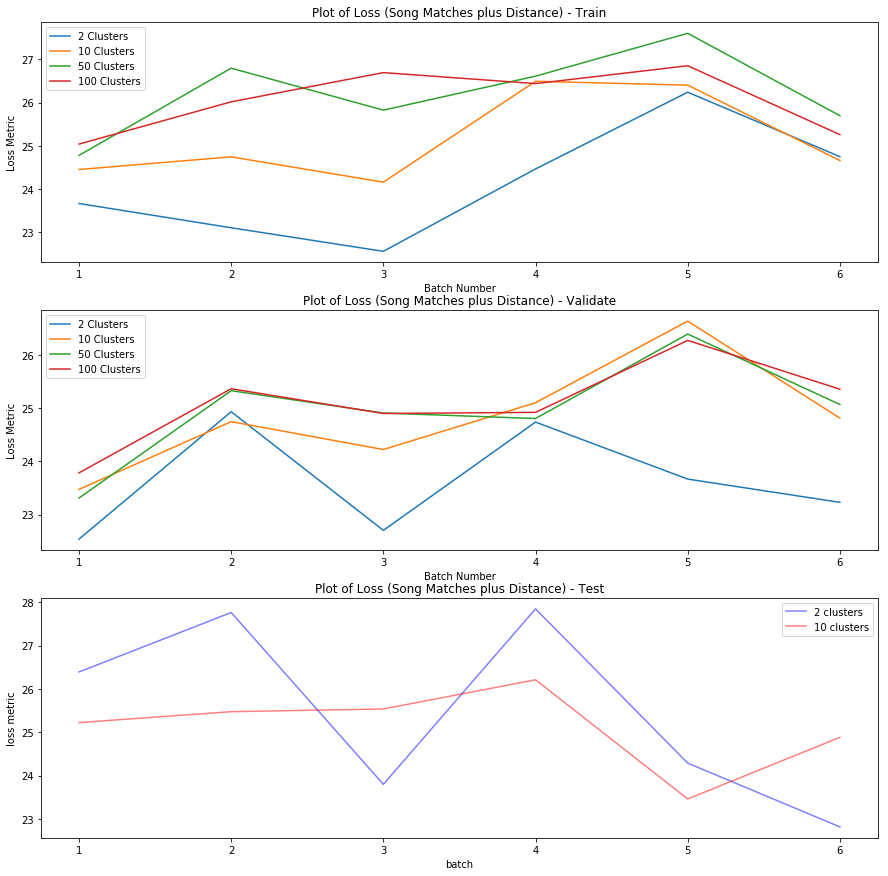

In [25]:
x = range(1, 7)
fig, axes = plt.subplots(3,1,figsize=(15,15))
axes = axes.ravel()
axes[0].set_title('Plot of Loss (Song Matches plus Distance) - Train')
axes[0].plot(x, t2['metric2'], label='2 Clusters')
axes[0].plot(x, t10['metric2'], label='10 Clusters')
axes[0].plot(x, t50['metric2'], label='50 Clusters')
axes[0].plot(x, t100['metric2'], label='100 Clusters')
axes[0].set_xlabel('Batch Number')
axes[0].set_ylabel('Loss Metric')
axes[0].legend()
axes[1].set_title('Plot of Loss (Song Matches plus Distance) - Validate')
axes[1].plot(x, v2['metric2'], label='2 Clusters')
axes[1].plot(x, v10['metric2'], label='10 Clusters')
axes[1].plot(x, v50['metric2'], label='50 Clusters')
axes[1].plot(x, v100['metric2'], label='100 Clusters')
axes[1].set_xlabel('Batch Number')
axes[1].set_ylabel('Loss Metric')
axes[1].legend()
axes[2].set_title('Plot of Loss (Song Matches plus Distance) - Test')
axes[2].plot(x, test2['metric2'], alpha=0.5, color='b', label='2 clusters')
axes[2].plot(x, test10['metric2'], alpha=0.5, color='r', label='10 clusters')
axes[2].set_xlabel('batch')
axes[2].set_ylabel('loss metric')
axes[2].legend()
plt.show()